In [2]:
import pandas as pd
import matplotlib
%matplotlib  inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

In [3]:
human_dev = pd.read_csv("human_development.csv")

In [4]:
rank_numbers = []
curr = 0.9
counter = 1
rank = []
index = human_dev["Human Development Index (HDI)"]
for i in range(len(human_dev)): 
    if index[i] >= curr: 
        rank_numbers.append(counter)
    else: 
        counter +=1
        curr -= 0.1
        rank_numbers.append(counter)

In [5]:
rank = pd.DataFrame(rank)
rank_numbers = pd.DataFrame(rank_numbers)

In [6]:
len(rank)

0

In [7]:
hdi = human_dev[0:188]
rank = rank[0:188]

In [8]:
features = hdi[["Life Expectancy at Birth","Expected Years of Education", "Mean Years of Education", \
                    "Gross National Income (GNI) per Capita", "GNI per Capita Rank Minus HDI Rank"]]
labels = rank_numbers[0:188]

In [9]:
labels= labels.as_matrix()
features.columns = [0, 1, 2, 3, 4]

In [10]:
print len(labels)
print len(features[0])
features_copy = features

188
188


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
cm = []

for i in range(5):
    features_copy = features
    features_copy = features_copy.drop(i, 1)
    print features_copy.columns
    features_temp = features_copy.as_matrix()
    features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=0.33, random_state=42)
    print len(features_train), len(features_test)
    gnb = GaussianNB()
    gnb.fit(features_train,labels_train)
    prediction_gnb = gnb.predict(features_test)
    print prediction_gnb
    cm.append(metrics.confusion_matrix(labels_test, prediction_gnb))

Int64Index([1, 2, 3, 4], dtype='int64')
125 63
[6 6 2 1 3 4 2 3 1 5 3 4 2 6 3 4 4 6 2 4 3 6 4 2 2 6 1 5 1 3 5 1 5 3 5 4 3
 5 2 4 4 4 3 3 2 5 6 3 2 2 3 3 5 3 5 2 2 5 5 6 4 3 1]
Int64Index([0, 2, 3, 4], dtype='int64')
125 63
[6 6 1 1 3 4 3 3 1 5 3 4 2 5 3 2 4 6 2 4 3 6 4 1 2 7 1 5 1 3 5 1 6 3 6 3 3
 5 2 3 3 3 3 3 2 4 6 3 1 2 2 4 5 3 4 2 2 5 6 7 3 4 1]
Int64Index([0, 1, 3, 4], dtype='int64')
125 63
[6 6 2 1 3 4 3 3 1 5 3 5 2 5 3 4 4 6 2 4 3 6 4 1 2 6 1 5 1 3 5 1 6 3 6 4 3
 4 2 3 4 3 3 3 2 4 5 3 2 2 2 4 4 3 4 1 2 5 6 6 3 3 1]
Int64Index([0, 1, 2, 4], dtype='int64')
125 63
[6 6 2 1 3 4 2 3 1 6 3 4 2 6 2 2 4 5 2 4 3 6 4 1 3 6 1 5 1 3 7 1 5 3 5 3 3
 5 2 3 3 3 3 3 2 5 6 2 2 2 2 3 5 3 4 2 2 5 5 6 3 2 1]
Int64Index([0, 1, 2, 3], dtype='int64')
125 63
[6 6 1 1 3 4 3 3 1 5 3 4 2 6 3 2 4 6 2 4 3 6 4 1 2 6 1 6 2 3 6 1 5 3 6 4 3
 5 2 3 3 3 3 3 2 5 6 3 2 2 2 4 5 3 4 2 2 5 5 6 3 3 1]


/Users/vivekramanan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
cm

[array([[ 5,  1,  0,  0,  0,  0,  0],
        [ 1, 10,  1,  0,  0,  0,  0],
        [ 0,  1, 14,  4,  0,  0,  0],
        [ 0,  0,  0,  6,  3,  0,  0],
        [ 0,  0,  0,  1,  5,  1,  0],
        [ 0,  0,  0,  0,  3,  6,  0],
        [ 0,  0,  0,  0,  0,  1,  0]]), array([[ 5,  1,  0,  0,  0,  0,  0],
        [ 4,  7,  1,  0,  0,  0,  0],
        [ 0,  2, 15,  2,  0,  0,  0],
        [ 0,  0,  2,  6,  1,  0,  0],
        [ 0,  0,  0,  1,  4,  2,  0],
        [ 0,  0,  0,  0,  2,  5,  2],
        [ 0,  0,  0,  0,  0,  1,  0]]), array([[ 5,  1,  0,  0,  0,  0,  0],
        [ 3,  8,  1,  0,  0,  0,  0],
        [ 0,  1, 16,  2,  0,  0,  0],
        [ 0,  0,  0,  8,  1,  0,  0],
        [ 0,  0,  0,  2,  3,  2,  0],
        [ 0,  0,  0,  0,  3,  6,  0],
        [ 0,  0,  0,  0,  0,  1,  0]]), array([[ 5,  1,  0,  0,  0,  0,  0],
        [ 2, 10,  0,  0,  0,  0,  0],
        [ 0,  4, 15,  0,  0,  0,  0],
        [ 0,  0,  2,  5,  2,  0,  0],
        [ 0,  0,  0,  1,  4,  2,  0],
        [

In [13]:
for i in range(len(cm)):
    curr_cm = cm[i]
    total = 0
    diag = 0
    for j in range(len(curr_cm)):
        curr = curr_cm[j]
        for k in range(len(curr)):
            total += curr[k]
            if j == k:
                diag += curr[k]
    print diag, total
    print "accuracy at ", i, ":", float(diag) / float(total)

46 63
accuracy at  0 : 0.730158730159
42 63
accuracy at  1 : 0.666666666667
46 63
accuracy at  2 : 0.730158730159
44 63
accuracy at  3 : 0.698412698413
50 63
accuracy at  4 : 0.793650793651


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("whitegrid")
sns.set_color_codes("dark")
print "Most important features: expected years of education, and gross national income (GNI) per capita"

Most important features: expected years of education, and gross national income (GNI) per capita


In [15]:
rank_numbers.columns = ["Labels"]

In [16]:
new_hdi = pd.concat([hdi, rank_numbers], axis = 1)
new_hdi[0:5]

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Labels
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,1
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,1
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,1
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,1
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,1


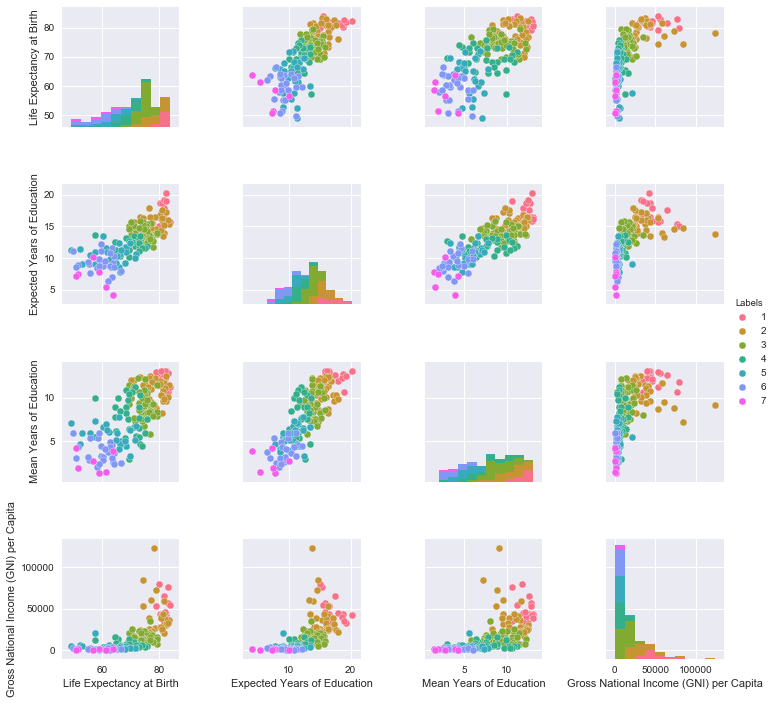

In [17]:
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("darkgrid")
sns.pairplot(new_hdi, vars=["Life Expectancy at Birth","Expected Years of Education", \
                   "Mean Years of Education","Gross National Income (GNI) per Capita"], hue="Labels")

In [18]:
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error
import numpy as np

def showRegression(model, regressionType, features_train, target_train, features_test, target_test):
    model.fit(features_train,target_train)
    predictions= model.predict(features_test)
    print(regressionType)
    mseScores[regressionType]= np.sqrt(mean_squared_error(target_test,predictions))
    print("MSE: ", np.sqrt(mean_squared_error(target_test,predictions)))

    plt.figure(figsize=(8,6))
    plt.plot([0.0,1.0],[0.0,1.0],"-",linewidth=2,c="r")
    plt.plot(target_test,predictions,"o",markersize=5,alpha=0.2,c="b")
    plt.xlabel("actual human development index")
    plt.ylabel("predicted human development index")

mseScores = {}

Int64Index([1, 2, 3, 4], dtype='int64')
125 63
Linear Regression
('MSE: ', 0.037356054355226063)
Int64Index([0, 2, 3, 4], dtype='int64')
125 63
Linear Regression
('MSE: ', 0.023094375534164997)
Int64Index([0, 1, 3, 4], dtype='int64')
125 63
Linear Regression
('MSE: ', 0.034092867546882295)
Int64Index([0, 1, 2, 4], dtype='int64')
125 63
Linear Regression
('MSE: ', 0.011404700193132045)
Int64Index([0, 1, 2, 3], dtype='int64')
125 63
Linear Regression
('MSE: ', 0.024472614135841113)


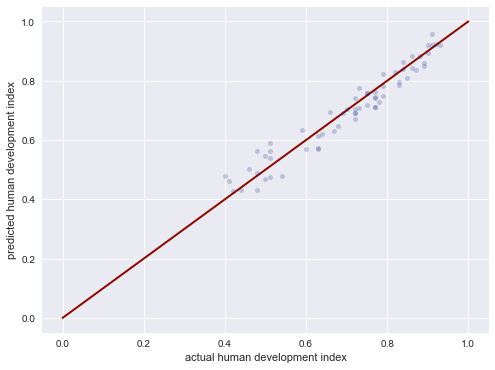

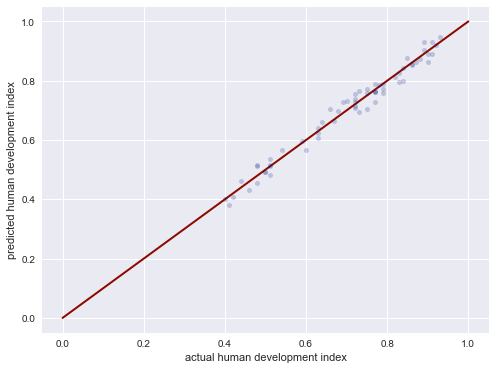

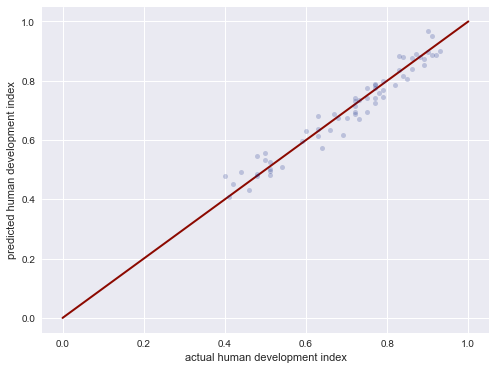

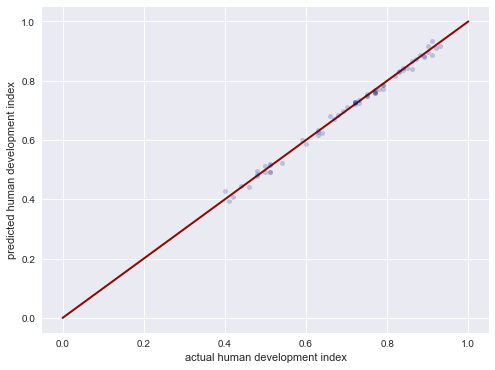

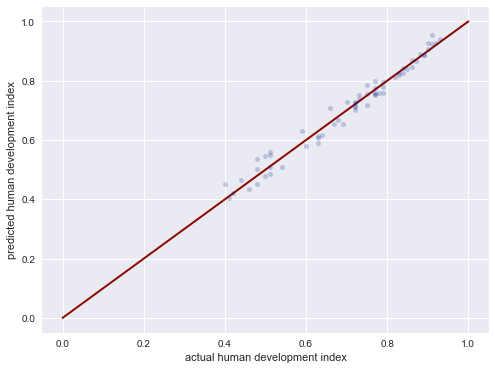

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
target = human_dev["Human Development Index (HDI)"][0:188]
target = target.as_matrix()

for i in range(5):
    features_copy = features
    features_copy = features_copy.drop(i, 1)
    print features_copy.columns
    features_temp = features_copy.as_matrix()
    features_train, features_test, target_train, target_test = train_test_split(features_temp, target, test_size=0.33, random_state=42)
    print len(features_train), len(features_test)
    model= linear_model.LinearRegression()
    showRegression(model, "Linear Regression", features_train,target_train, features_test, target_test)